In [1]:
import pandas as pd
import numpy as np
import os
import string
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

In [2]:
permit = pd.read_excel('../../../data/raw/Connecticut NPDES Permits.xlsx')
ct_emissions = pd.read_excel('../../../data/raw/Public GHG data 1990-2021.xlsx', sheet_name="Emission Totals")

In [3]:
Fair = permit['County'].value_counts().get('Fairfield', 0)
Hart = permit['County'].value_counts().get('Hartford', 0)+permit['County'].value_counts().get('Tolland', 0)+permit['County'].value_counts().get('Middlesex', 0)
NewH = permit['County'].value_counts().get('New Haven', 0)

In [4]:
fair_ratio = Fair/42
Hart_ratio = Hart/42
NewH_ratio = NewH/42
rest = 42-Fair-Hart-NewH
rest

0

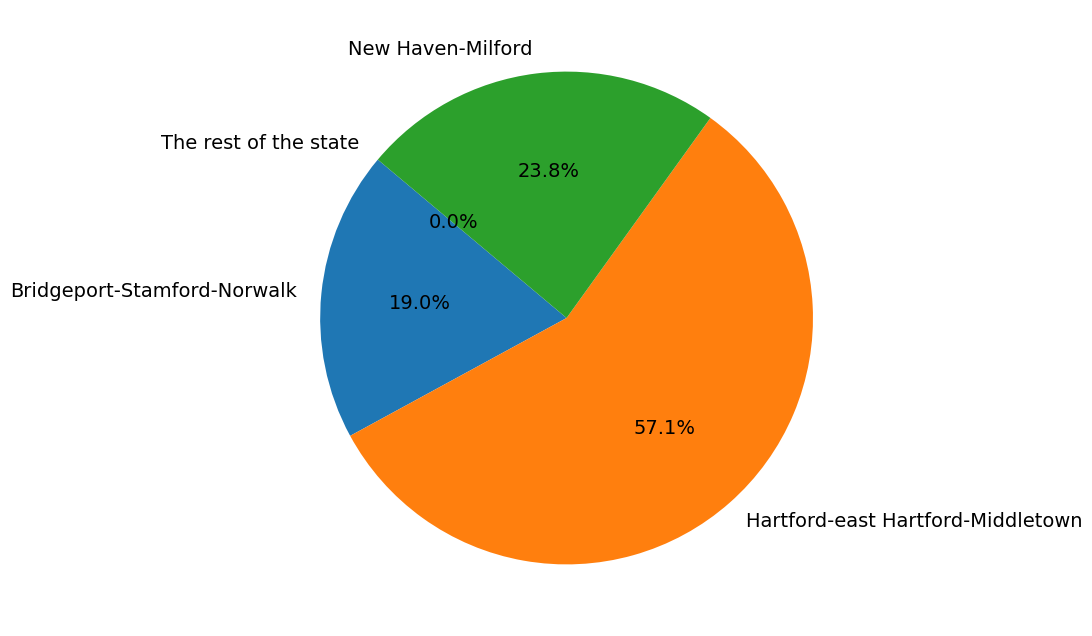

In [5]:
# Labels and ratios
labels = ['Bridgeport-Stamford-Norwalk', 'Hartford-east Hartford-Middletown', 'New Haven-Milford', 'The rest of the state']
ratios = [Fair, Hart, NewH, rest]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(ratios, labels=labels, autopct='%1.1f%%', startangle=140,textprops={'fontsize': 14})
plt.savefig('../../../figures/ghg-emissions-wastewater-facilities.png', dpi=600,bbox_inches='tight')


In [6]:
wastewater = ct_emissions.at[21,'2021 (ESTIMATE)']

In [7]:
fairf = wastewater*fair_ratio
Hartf = wastewater*Hart_ratio
NewHa = wastewater*NewH_ratio
wastewater

0.39

In [8]:
wastewater = pd.DataFrame({
        'MSA': ['New Haven-Milford','Hartford-East Hartford-Middletown','Bridgeport-Stamford-Norwalk'],
        'GHG Emissions (MMTCO2e)': [NewHa,Hartf,fairf]
    })

wastewater

,MSA,GHG Emissions (MMTCO2e)
0,New Haven-Milford,0.092857
1,Hartford-East Hartford-Middletown,0.222857
2,Bridgeport-Stamford-Norwalk,0.074286


In [11]:
#scale up the emissions by population to incorporate the new towns
population_five_towns = pd.read_csv('../../../results/population_five_towns.csv')
population_five_towns = population_five_towns[['Year', 'New Haven-Milford, CT Metro Area', 'Hartford-East Hartford-Middletown, CT Metro Area', 'Bridgeport-Stamford-Norwalk, CT Metro Area', 'Connecticut']]
population_five_towns_21 = population_five_towns.iloc[0,1:4]

population = pd.read_csv('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/tidy/population.csv')
population = population[['Year', 'New Haven-Milford, CT Metro Area', 'Hartford-East Hartford-Middletown, CT Metro Area', 'Bridgeport-Stamford-Norwalk, CT Metro Area', 'Connecticut']]
population_21 = population.iloc[0,1:4]
numeric_pop_21 = pd.to_numeric(population_21.str.replace(',', ''), errors='coerce')

ratio_NHM = population_five_towns_21[0]/numeric_pop_21[0]
ratio_HHM = population_five_towns_21[1]/numeric_pop_21[1]
ratio_BSN = population_five_towns_21[2]/numeric_pop_21[2]

# Define the numbers to multiply for each MSA
multipliers = {'New Haven-Milford': ratio_NHM, 'Hartford-East Hartford-Middletown': ratio_HHM, 'Bridgeport-Stamford-Norwalk': ratio_BSN}

# Multiply the values in the specified column by the respective multipliers
wastewater['GHG Emissions (MMTCO2e)'] = wastewater.apply(lambda row: row['GHG Emissions (MMTCO2e)'] * multipliers.get(row['MSA'], 1), axis=1)

wastewater

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_14876\911084063.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ratio_NHM = population_five_towns_21[0]/numeric_pop_21[0]
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_14876\911084063.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ratio_HHM = population_five_towns_21[1]/numeric_pop_21[1]
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_14876\911084063.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value b

,MSA,GHG Emissions (MMTCO2e)
0,New Haven-Milford,0.092857
1,Hartford-East Hartford-Middletown,0.227553
2,Bridgeport-Stamford-Norwalk,0.076608


In [12]:
wastewater.to_csv('../../../data/tidy/wastewater-emissions.csv')

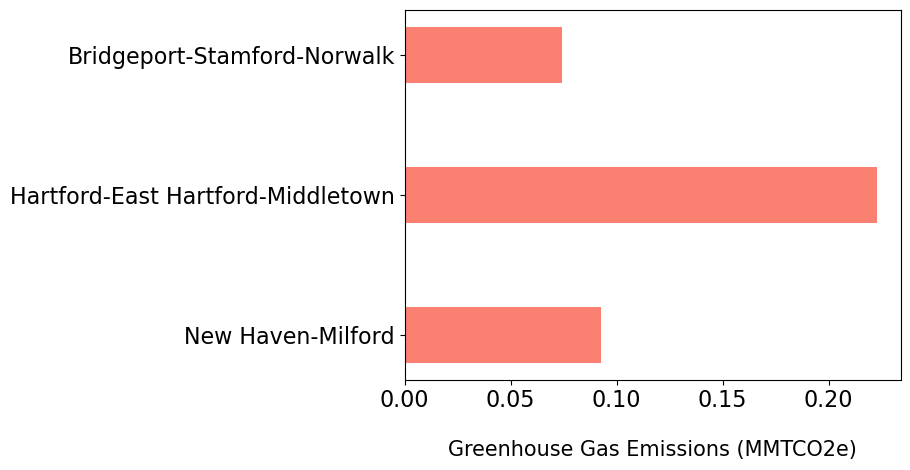

In [13]:
values = [NewHa,Hartf,fairf]
msa= ['New Haven-Milford','Hartford-East Hartford-Middletown','Bridgeport-Stamford-Norwalk']
plt.barh(msa, values, 0.4, color="salmon")
plt.xlabel("Greenhouse Gas Emissions (MMTCO2e)",fontsize=15, labelpad=20)

plt.xticks(fontsize=16)  # Adjust the font size as needed
plt.yticks(fontsize=16)

#plt.show() 

plt.savefig('../../../figures/Report-images/ghg-emissions-wastewater.png', dpi=600,bbox_inches='tight')

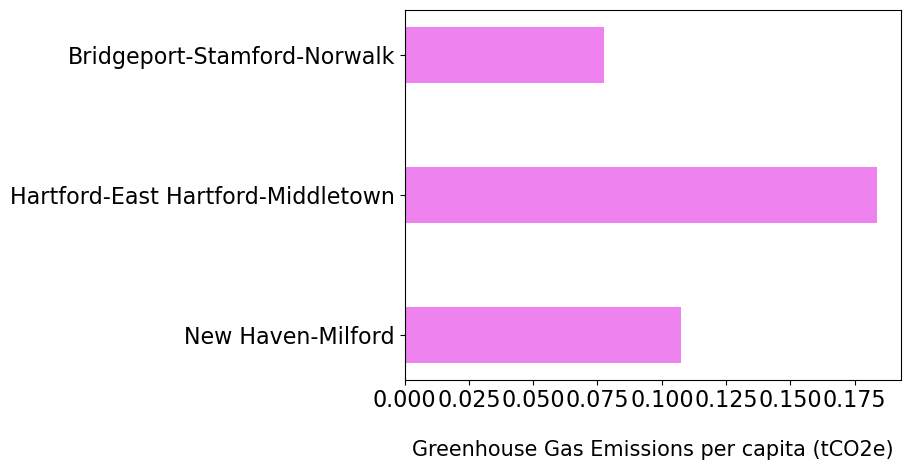

In [14]:
values = [0.10738,0.183675,0.077668]
msa= ['New Haven-Milford','Hartford-East Hartford-Middletown','Bridgeport-Stamford-Norwalk']
plt.barh(msa, values, 0.4, color="violet")
plt.xlabel("Greenhouse Gas Emissions per capita (tCO2e)",fontsize=15, labelpad=20)

plt.xticks(fontsize=16)  # Adjust the font size as needed
plt.yticks(fontsize=16)

#plt.show() 

plt.savefig('../../../figures/Report-images/ghg-emissions-wastewater-per-capita.png', dpi=600,bbox_inches='tight')